In [5]:
# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
import scipy.stats as ss

MAE: 23419.42
RMSE: 33591.62
R² Score: 0.9528


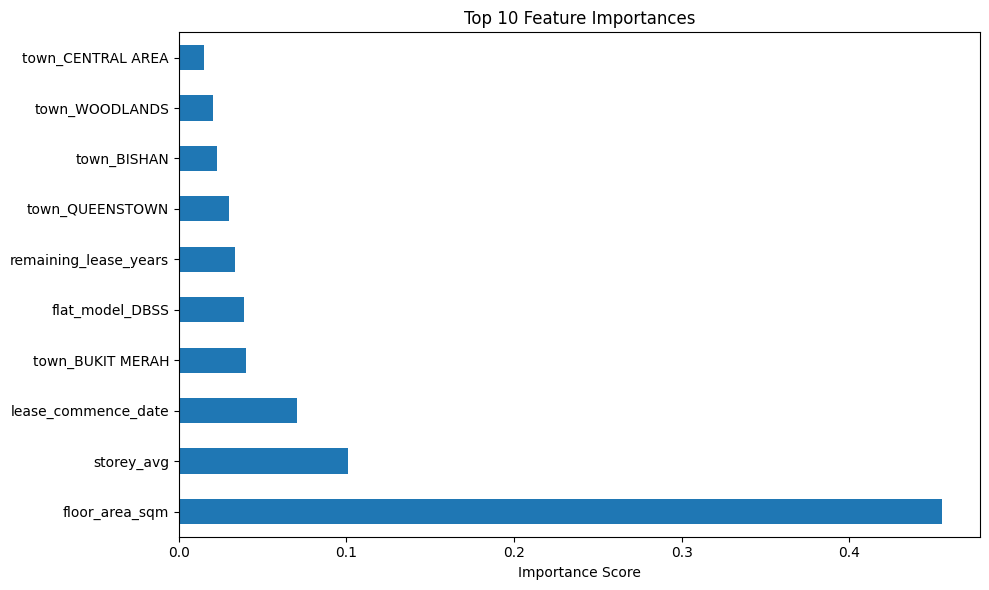

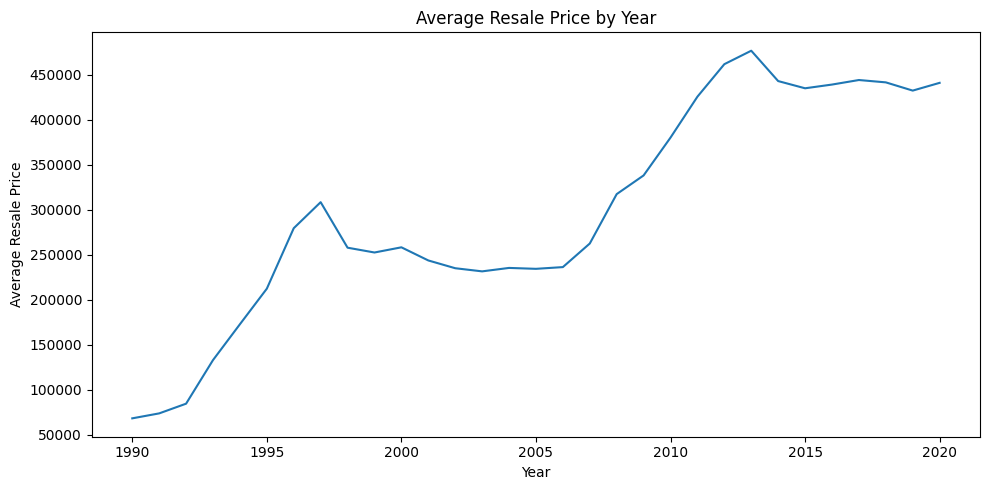

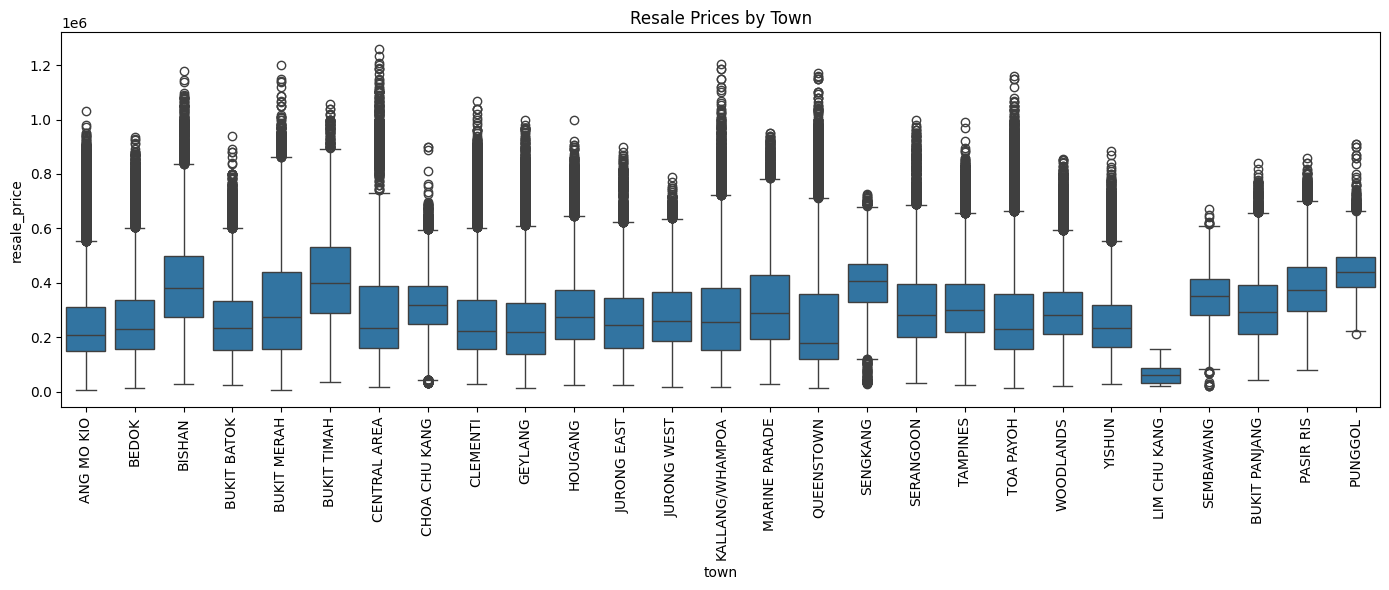

In [6]:
# 📦 STEP 1: Load and Extract ZIP file locally
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import os
import pandas as pd

# Set the folder where the CSV files are located
csv_dir = r"C:\Users\hp\Desktop\Kaggle_HDB"  # <- Update to your actual folder path
csv_files = [file for file in os.listdir(csv_dir) if file.endswith(".csv")]

all_dataframes = []
for file in csv_files:
    df_temp = pd.read_csv(os.path.join(csv_dir, file))
    all_dataframes.append(df_temp)

df = pd.concat(all_dataframes, ignore_index=True)
df.columns = df.columns.str.strip()

df_raw = df.copy()  # Save a copy for visualization

# 🧹 STEP 2: Preprocessing
df["month"] = pd.to_datetime(df["month"])
df["year"] = df["month"].dt.year
df["month_num"] = df["month"].dt.month

# Also add to raw df for visualization
df_raw["month"] = pd.to_datetime(df_raw["month"])
df_raw["year"] = df_raw["month"].dt.year
df_raw["month_num"] = df_raw["month"].dt.month

# Convert storey range
def convert_storey_range(storey_str):
    try:
        low, high = map(int, storey_str.split(" TO "))
        return (low + high) / 2
    except:
        return None

df["storey_avg"] = df["storey_range"].apply(convert_storey_range)

# Convert remaining lease
def parse_remaining_lease(lease_str):
    try:
        parts = lease_str.split()
        years = int(parts[0])
        months = int(parts[2]) if len(parts) > 2 else 0
        return years + months / 12
    except:
        return None

if "remaining_lease" in df.columns:
    df["remaining_lease_years"] = df["remaining_lease"].apply(parse_remaining_lease)

# Drop missing values
df = df.dropna()

# One-hot encode categorical variables
categorical_cols = ["town", "flat_type", "flat_model"]
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns], drop_first=True)

# Drop unused columns
drop_cols = ["block", "street_name", "storey_range", "remaining_lease", "month"]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# ✅ STEP 3: Model Setup
X = df.drop("resale_price", axis=1)
y = df["resale_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# ✅ STEP 4: Feature Importance
plt.figure(figsize=(10, 6))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ✅ STEP 5: Visualizations

# 1. Price trend over time
plt.figure(figsize=(10, 5))
avg_price_by_year = df_raw.groupby("year")["resale_price"].mean().reset_index()
sns.lineplot(data=avg_price_by_year, x="year", y="resale_price")
plt.title("Average Resale Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Resale Price")
plt.tight_layout()
plt.show()

# 2. Price by town
if "town" in df_raw.columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df_raw, x="town", y="resale_price")
    plt.xticks(rotation=90)
    plt.title("Resale Prices by Town")
    plt.tight_layout()
    plt.show()


